In [2]:
import numpy as np 
import matplotlib.pyplot as plt

654.119
654.119


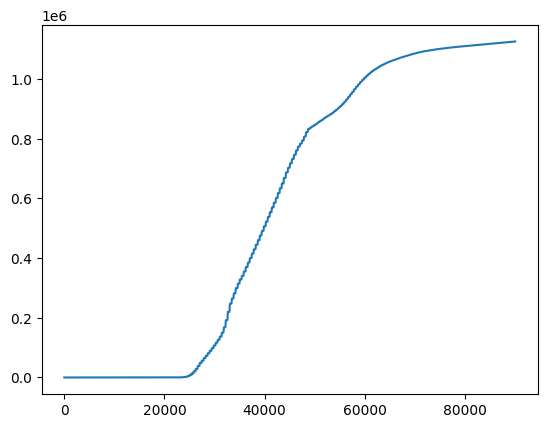

In [9]:
# parse P3 ppm file 
def parse_ppm(file):
    with open(file, 'r') as f:
        # read header
        magic_number = f.readline()
        size = f.readline()
        size = size.split()
        width = int(size[0])
        height = int(size[1])
        max_val = f.readline()
        # read data
        data = f.read()
        data = data.split('\n')
    data = [[float(x) for x in line.split(' ')] for line in data if line != '']
    # split data into list of integers
    return width, height, data

pixel_data_img1 = parse_ppm('img1.ppm')[2]
pixel_data_img2 = parse_ppm('img2.ppm')[2]

print(sum(pixel_data_img1[0]))
print(sum(pixel_data_img2[0]))

comb_dist = lambda pd : [sum(pixel) for pixel in pd]

cd1 = comb_dist(pixel_data_img1)
cd2 = comb_dist(pixel_data_img2)
diff_d = []

for img1, img2 in list(zip(cd1, cd2)):
    diff = abs(img1 - img2)
    diff_d.append(diff + (diff * 0.1))
    
# write diff_d to a file without truncating decimals
with open('diff_d.txt', 'w') as f:
    for diff in diff_d:
        f.write(str(diff) + '\n')

cum_diff_d = []
for i, diff in enumerate(diff_d):
    if i == 0:
        cum_diff_d.append(diff)
    else:
        cum_diff_d.append(diff + cum_diff_d[i-1])
        
plt.plot(cum_diff_d)

In [7]:
# write cum_diff_d to file 
with open('cum_diff_d.txt', 'w') as f:
    for item in cum_diff_d:
        f.write("%s\n" % item)